Gravity Brightening/Darkening (gravb_bol)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', dataset='lc01')
b.add_dataset('mesh', times=[0], columns=['intensities*'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

Relevant Parameters
--------------------

The 'gravb_bol' parameter corresponds to the &beta; coefficient for gravity darkening corrections.

In [4]:
print(b['gravb_bol'])

ParameterSet: 2 parameters
     gravb_bol@primary@component: 0.32
   gravb_bol@secondary@component: 0.32


In [5]:
print(b['gravb_bol@primary'])

Parameter: gravb_bol@primary@component
                       Qualifier: gravb_bol
                     Description: Bolometric gravity brightening
                           Value: 0.32
                  Constrained by: 
                      Constrains: None
                      Related to: None



If you have a logger enabled, PHOEBE will print a warning if the value of gravb_bol is outside the "suggested" ranges.  Note that this is strictly a warning, and will never turn into an error at [b.run_compute()](../api/phoebe.frontend.bundle.Bundle.run_compute.md).

You can also manually call [b.run_checks()](../api/phoebe.frontend.bundle.Bundle.run_checks.md).  The first returned item tells whether the system has passed checks: True means it has, False means it has failed, and None means the tests pass but with a warning.  The second argument tells the first warning/error message raised by the checks.

The checks use the following "suggested" values:
 * teff 8000+: gravb_bol >= 0.9 (suggest 1.0)
 * teff 6600-8000: gravb_bol 0.32-1.0
 * teff 6600-: grav_bol < 0.9 (suggest 0.32)

In [6]:
print(b.run_checks())

(True, '')


In [7]:
b['teff@primary'] = 8500
b['gravb_bol@primary'] = 0.8
print(b.run_checks())

Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=8500K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=8500K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.80.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


(None, "'primary' probably has a radiative atm (teff=8500K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.80.")


In [8]:
b['teff@primary'] = 7000
b['gravb_bol@primary'] = 0.2
print(b.run_checks())

Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' has intermittent temperature (6600K<teff=7000K<8000K), gravb_bol might be better between 0.32-1.00 than gravb_bol=0.20.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


(None, "'primary' has intermittent temperature (6600K<teff=7000K<8000K), gravb_bol might be better between 0.32-1.00 than gravb_bol=0.20.")


In [9]:
b['teff@primary'] = 6000
b['gravb_bol@primary'] = 1.0
print(b.run_checks())

Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' has intermittent temperature (6600K<teff=6000K<8000K), gravb_bol might be better between 0.32-1.00 than gravb_bol=0.20.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


(None, "'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00.")


Influence on Intensities
------------------

In [10]:
b['teff@primary'] = 6000
b['gravb_bol@primary'] = 0.32

Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [11]:
b.run_compute(model='gravb_bol_32')

<ParameterSet: 8 parameters | datasets: mesh01, lc01>

/home/kyle/.local/lib/python2.7/site-packages/matplotlib/colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


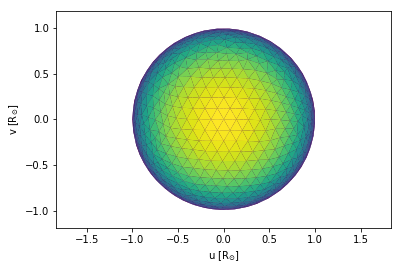

In [12]:
afig, mplfig = b['primary@mesh01@gravb_bol_32'].plot(fc='intensities', ec='None', show=True)

In [13]:
b['gravb_bol@primary'] = 1.0

Thu, 17 Sep 2020 11:01 PARAMETERS   WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [14]:
b.run_compute(model='gravb_bol_10')

Thu, 17 Sep 2020 11:01 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00.


<ParameterSet: 8 parameters | datasets: mesh01, lc01>

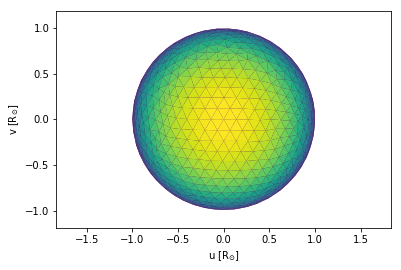

In [15]:
afig, mplfig = b['primary@mesh01@gravb_bol_10'].plot(fc='intensities', ec='None', show=True)

Comparing these two plots, it is essentially impossible to notice any difference between the two models.  But if we compare the intensities directly, we can see that there is a subtle difference, with a maximum difference of about 3%.

In [16]:
np.nanmax((b.get_value('intensities', component='primary', model='gravb_bol_32') - b.get_value('intensities', component='primary', model='gravb_bol_10'))/b.get_value('intensities', component='primary', model='gravb_bol_10'))

0.03333869722432121